In [1]:
import wandb
import matplotlib.pyplot as plt
import numpy as np
import os
from matplotlib import colormaps
from io import StringIO  
import sys
sys.path.append('../')
from utils.results_utils import BaseSubsamplingType
import torch
import pandas as pd
api = wandb.Api()
from importlib import reload

import subsampling_classes
import plot_funcs
subsampling_classes = reload(subsampling_classes)
plot_funcs = reload(plot_funcs)
from subsampling_classes import *
from plot_funcs import *

In [3]:
is_saving_allowed = True
force_recompute = False

entity = 'haraghi'
folder_name = 'paper'
experiment_folder_name = 'sparsity_vs_acc'

assert not is_saving_allowed, "Are you sure? Please set is_saving_allowed to False."

AssertionError: Are you sure? Please set is_saving_allowed to False.

In [4]:
subfolder_name = os.path.join('../images/subsampling_methods',folder_name,experiment_folder_name)
if is_saving_allowed:
    if not os.path.exists(subfolder_name):
        os.makedirs(subfolder_name)
    # file_path = os.path.join(subfolder_name,"sparsity_vs_acc.tex")

In [5]:
datasets_name_and_num_classes = {
    "NCARS": {"name": "N-Cars", "num_classes": 2},
    "NASL": {"name": "N-ASL", "num_classes": 24},
    "NCALTECH101": {"name": "N-Caltech101", "num_classes": 101},
    "DVSGESTURE_TONIC": {"name": "DVS-Gesture", "num_classes": 11},}
for key,value in datasets_name_and_num_classes.items():
    print(f"{key}: {value['name']}")

NCARS: N-Cars
NASL: N-ASL
NCALTECH101: N-Caltech101
DVSGESTURE_TONIC: DVS-Gesture


In [6]:
kw = "NCARS"
projects = api.projects(entity="haraghi")
for project in projects:
    if kw in project.name:
        print(project.name)

Spatial_NCARS_CORRECTED_OFFSET_100x120_12s
Spatial_NCARS_CORRECTED_OFFSET_100x120_42s
TOS_2D_Harris_NCARS_100x120_24s
TOS_2D_Harris_NCARS_100x120_12s
TOS_2D_Harris_NCARS_100x120_42s
Baseline_EventCount_NCARS_100x120_42s_spatial_upsampled
Baseline_EventCount_NCARS_100x120_42s
Spatiotemporal_fixed_NCARS_100x120_42s_tau30_7x7_mean_normalized
Spatiotemporal_fixed_NCARS_100x120_42s_tau100_5x5
Spatiotemporal_fixed_NCARS_100x120_42s_tau100_11x11
Spatiotemporal_fixed_NCARS_100x120_42s_tau100_9x9
Spatiotemporal_fixed_NCARS_100x120_42s_tau10
Spatiotemporal_fixed_NCARS_100x120_42s_tau100
Spatiotemporal_fixed_NCARS_100x120_42s
Random_fixed_NCARS_100x120_42s
Temporal_dataset_wide_random_offset_NCARS_100x120_42s
Spatial_dataset_wide_random_offsets_NCARS_100x120_42s
NCARS-in-memory
Spatial_dataset_wide_random_offsets_NCARS_42s
Temporal_dataset_wide_random_offsets_NCARS_42s
Spatiotemporal_fixed_NCARS_42s
Random_fixed_NCARS_42s
Subsamplimg-vs-bandwidth-NCARS
FINAL-NCARS-varyinig-sparsity


In [7]:
datasets_name_and_project = {
"NASL":            ["Spatial_NASL_CORRECTED_OFFSET_42s",
                    "Temporal_NASL_dataset_wide_random_offsets_42s",
                    "Random_fixed_NASL_42s",
                    ],                  
"FAN1VS3":             "Subsamplimg-vs-bandwidth-FAN1VS3",
"NCALTECH101":      ["Random_fixed_NCALTECH101",
                     "Spatiotemporal_fixed_NCALTECH101",
                     "Temporal_dataset_wide_random_offsets_NCALTECH101",
                     "Spatial_dataset_wide_random_offsets_NCALTECH101",
                     "Baseline_EventCount_NCALTECH101_spatial_upsampled",
                     "TOS_2D_Harris_NCALTECH101",
                    ],
"DVSGESTURE_TONIC": [
                        "Subsamplimg_methods_DVS_GESTURE_TONIC",
                        "Temporal_dataset_wide_random_offsets_DVS_GESTURE_TONIC", 
                        "Spatial_DVSGESTURE_TONIC_CORRECTED_OFFSET",
                        # "Spatial_with_random_offsets_DVS_GESTURE_TONIC",
                        # "Temporal_random_offsets_DVS_GESTURE_TONIC",
                        "Baseline_EventCount_DVS_GESTURE_TONIC_spatial_upsampled",
                        "TOS_2D_Harris_DVS_GESTURE_TONIC_spatial_upsampled",
                    ],
"NCARS":          [
                        "Spatial_NCARS_CORRECTED_OFFSET_100x120_12s",
                        "Spatial_NCARS_CORRECTED_OFFSET_100x120_42s",
                        # "Temporal_dataset_wide_random_offsets_NCARS_42s",
                        # # "Spatiotemporal_fixed_NCARS_42s",
                        "Random_fixed_NCARS_100x120_42s",
                        "Temporal_dataset_wide_random_offset_NCARS_100x120_42s",
                        "Spatial_dataset_wide_random_offsets_NCARS_100x120_42s",
                        "Spatiotemporal_fixed_NCARS_100x120_42s_tau10",
                        "Spatiotemporal_fixed_NCARS_100x120_42s_tau100",
                        "Spatiotemporal_fixed_NCARS_100x120_42s",
                        "Spatiotemporal_fixed_NCARS_100x120_42s_tau100_5x5",
                        "Spatiotemporal_fixed_NCARS_100x120_42s_tau100_11x11",
                        "Spatiotemporal_fixed_NCARS_100x120_42s_tau100_9x9",
                        "Spatiotemporal_fixed_NCARS_100x120_42s_tau30_7x7_mean_normalized",
                        "Baseline_EventCount_NCARS_100x120_42s_spatial_upsampled",
                        "TOS_2D_Harris_NCARS_100x120_24s",
                        "TOS_2D_Harris_NCARS_100x120_12s",
                        "TOS_2D_Harris_NCARS_100x120_42s",
                   ],
}

In [10]:
result_dict = {}
for dataset, project_name in datasets_name_and_project.items():
        
    if dataset != "NCALTECH101" and dataset != "NCARS" and dataset != "DVSGESTURE_TONIC": 
        continue
    
    print('*'*50)
    print(dataset+":", flush=True)
    print('*'*50)
    result_dict[dataset] = [ 
                    Spatial(dataset_name = dataset),
                    Temporal(dataset_name = dataset),
                    Random(dataset_name = dataset),
                    Spatiotemporal30(dataset_name = dataset),
                    # SpatialRandom(dataset_name = dataset),
                    # SpatialZeroOffset(dataset_name = dataset),
                    # TemporalRandom(dataset_name = dataset),
                    # TemporalZeroOffset(dataset_name = dataset),
            
                    # Spatiotemporal10(dataset_name = dataset),
                    # Spatiotemporal30(dataset_name = dataset),
                    # Spatiotemporal100(dataset_name = dataset),
                    # Spatiotemporal100_5x5(dataset_name = dataset),
                    # Spatiotemporal100_9x9(dataset_name = dataset),
                    # Spatiotemporal100_11x11(dataset_name = dataset),
                    Spatiotemporal_normalized_mean(dataset_name = dataset),
                    BaseLineEventCount(dataset_name = dataset),
                    TOS2DHarris(dataset_name = dataset),
                    
                ]

    for result_class in result_dict[dataset]:
        result_class.label = legend_labels[result_class.get_name()] if result_class.get_name() in legend_labels else result_class.get_name()
        result_class.color = color_dict[result_class.get_name()] if result_class.get_name() in color_dict else result_class.get_color()
        result_class.marker = marker_dict[result_class.get_name()] if result_class.get_name() in marker_dict else result_class.get_marker()
        
    if force_recompute or not os.path.exists(f"{dataset}_results.pt"):
        if isinstance(project_name,list):
            runs = []
            for p in project_name:
                print(p, flush=True)
                runs.extend(api.runs(f"{entity}/{p}"))
        else:
            print(project_name, flush=True)
            runs = api.runs(f"{entity}/{project_name}")
        runs = [r for r in runs if r.state == "finished"]
        if len(runs) == 0:
            print(f"No runs found for {project_name}", flush=True)
            continue
        
        for r in runs:
            for result_class in result_dict[dataset]:
                result_class.process_run(r)
        result_to_save = []
        for result_class in result_dict[dataset]:
            result_class.create_data_frames()
            result_to_save.append(result_class.to_dict())
        torch.save(result_to_save, f"{dataset}_results.pt")
        
    else:
        result_to_save = torch.load(f"{dataset}_results.pt")
        for result_class in result_dict[dataset]:
            found_flag = False
            for result in result_to_save:
                if result_class.get_name() == result["name"]:
                    result_class.df = pd.read_json(StringIO(result["df"]))
                    result_class.df_zipped = pd.read_json(StringIO(result["df_zipped"]))
                    result_class._agg_bandwidth_acc()
                    result_class._agg_zipped_parameters()
                    result_class._check_empty_num_events()
                    result_class._clean_data_frame() 
                    result_class. _assert_non_empty_num_events_in_zipped()
                    print(f"Loaded {result_class.get_name()} from {dataset}_results.pt")
                    found_flag = True
                    break
            assert found_flag, f"Result not found for {result_class.get_name()} in {dataset}_results.pt"    


**************************************************
NCALTECH101:
**************************************************
Loaded spatial_dataset_wide_random_offsets from NCALTECH101_results.pt
Loaded temporal_dataset_wide_random_offset from NCALTECH101_results.pt
Loaded random_fixed from NCALTECH101_results.pt
Loaded spatiotemporal_fixed_30_7x7 from NCALTECH101_results.pt
Loaded spatiotemporal_fixed_normalized_mean from NCALTECH101_results.pt
Loaded baseline_event_count from NCALTECH101_results.pt


/tmp/ipykernel_1850268/3132876940.py:61: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  result_to_save = torch.load(f"{dataset}_results.pt")
/home/hesam/Projects/DGCNN_CV_for

Loaded tos2dharris_fixed from NCALTECH101_results.pt
**************************************************
DVSGESTURE_TONIC:
**************************************************
Loaded spatial_dataset_wide_random_offsets from DVSGESTURE_TONIC_results.pt
Loaded temporal_dataset_wide_random_offset from DVSGESTURE_TONIC_results.pt
Loaded random_fixed from DVSGESTURE_TONIC_results.pt
Loaded spatiotemporal_fixed_30_7x7 from DVSGESTURE_TONIC_results.pt
Loaded spatiotemporal_fixed_normalized_mean from DVSGESTURE_TONIC_results.pt
Loaded baseline_event_count from DVSGESTURE_TONIC_results.pt
Loaded tos2dharris_fixed from DVSGESTURE_TONIC_results.pt
**************************************************
NCARS:


/home/hesam/Projects/DGCNN_CV_format/subsampling_figures/../utils/results_utils.py:112: FutureWarning: The provided callable <function nanmean at 0x7a3a2616e3e0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  as_index=False).agg(
/home/hesam/Projects/DGCNN_CV_format/subsampling_figures/../utils/results_utils.py:112: FutureWarning: The provided callable <function nanstd at 0x7a3a2616ede0> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  as_index=False).agg(
/home/hesam/Projects/DGCNN_CV_format/subsampling_figures/../utils/results_utils.py:112: FutureWarning: The provided callable <function nanmean at 0x7a3a2616e3e0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep curr

**************************************************
Loaded spatial_dataset_wide_random_offsets from NCARS_results.pt
Loaded temporal_dataset_wide_random_offset from NCARS_results.pt
Loaded random_fixed from NCARS_results.pt
Loaded spatiotemporal_fixed_30_7x7 from NCARS_results.pt
Loaded spatiotemporal_fixed_normalized_mean from NCARS_results.pt
Loaded baseline_event_count from NCARS_results.pt
Loaded tos2dharris_fixed from NCARS_results.pt


/home/hesam/Projects/DGCNN_CV_format/subsampling_figures/../utils/results_utils.py:126: FutureWarning: The provided callable <function nanmean at 0x7a3a2616e3e0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  as_index=False).agg(
/home/hesam/Projects/DGCNN_CV_format/subsampling_figures/../utils/results_utils.py:112: FutureWarning: The provided callable <function nanmean at 0x7a3a2616e3e0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  as_index=False).agg(
/home/hesam/Projects/DGCNN_CV_format/subsampling_figures/../utils/results_utils.py:112: FutureWarning: The provided callable <function nanstd at 0x7a3a2616ede0> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep cur

In [74]:
import pandas as pd
import numpy as np

class YourClass:
    def __init__(self, df):
        self.df = df

    def set_parameter_loader(self):
        # Replace with your logic to set parameters
        return {'param1': None, 'param2': None}

    def _agg_bandwidth_acc(self):
        self.df = self.df.groupby(
            by=list(self.set_parameter_loader().keys()), 
            dropna=False, 
            as_index=False
        ).agg(
            {
                'val_acc': 'mean',  # Using the string 'mean' instead of np.nanmean
                'test_acc': 'mean', 
                'bandwidth': 'mean', 
                'num_events': 'mean',
            }
        )

# Example usage
data = {
    'param1': ['A', 'A', 'B', 'B'],
    'param2': [1, 1, 2, 2],
    'val_acc': [0.9, 0.8, np.nan, 0.85],
    'test_acc': [0.88, 0.86, 0.87, 0.84],
    'bandwidth': [10, 20, 30, 40],
    'num_events': [100, 150, 200, 250]
}

df = pd.DataFrame(data)
obj = YourClass(df)
obj._agg_bandwidth_acc()
print(obj.df)


  param1  param2  val_acc  test_acc  bandwidth  num_events
0      A       1     0.85     0.870       15.0       125.0
1      B       2     0.85     0.855       35.0       225.0


0: Spatial (dataset wide random offsets)
1: Temporal (dataset wide random offsets)
2: Random (fixed subsampling)
3: Spatiotemporal 30 7x7
4: Spatiotemporal (mean normalized)
5: Baseline (event count)
6: TOS 2D Harris


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


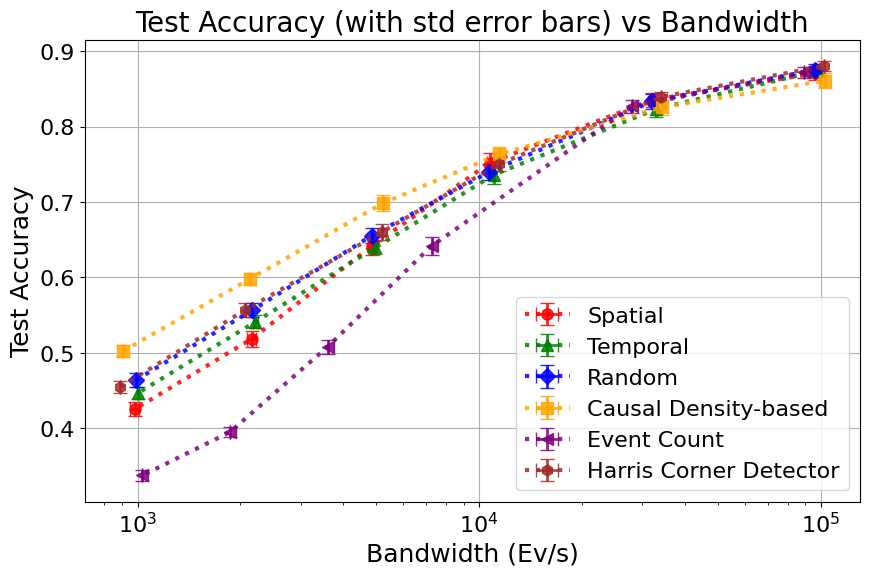

In [12]:
ds_name = "NCALTECH101" 
for ii,r in enumerate(result_dict[ds_name]):
    print(f"{ii}: {r.label}")
if is_saving_allowed:
    save_to_path = os.path.join(subfolder_name,f'{ds_name}.eps')
else:
    save_to_path = None
plot_all([result_dict[ds_name][i] for i in [0,1,2,3,5,6]],save_to=save_to_path, x_axis='bandwidth')

0: Spatial (dataset wide random offsets)
1: Temporal (dataset wide random offsets)
2: Random (fixed subsampling)
3: Spatiotemporal 30 7x7
4: Spatiotemporal (mean normalized)
5: Baseline (event count)
6: TOS 2D Harris


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


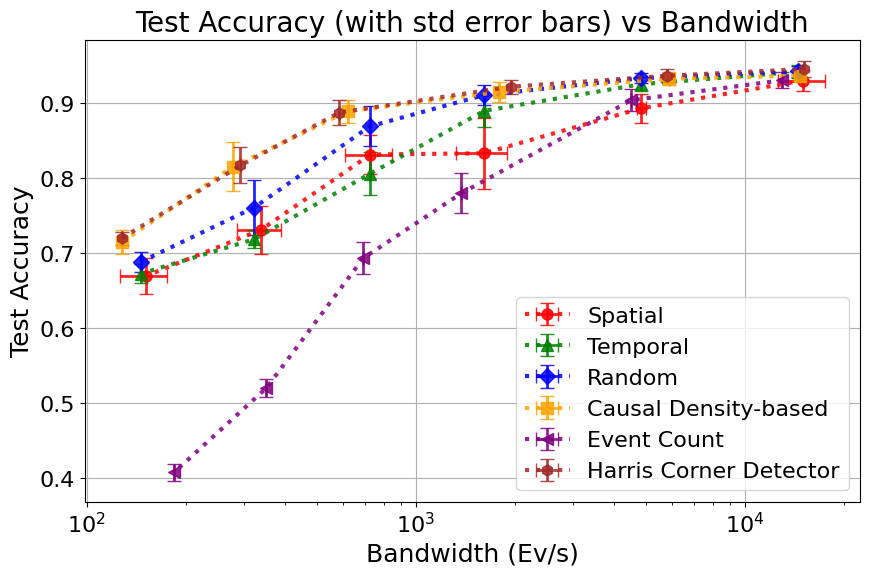

In [13]:
ds_name = "DVSGESTURE_TONIC" 
for ii,r in enumerate(result_dict[ds_name]):
    print(f"{ii}: {r.label}")
if is_saving_allowed:
    save_to_path = os.path.join(subfolder_name,f'{ds_name}.eps')
else:
    save_to_path = None
plot_all([result_dict[ds_name][i] for i in [0,1,2,3,5,6]],save_to=save_to_path, x_axis='bandwidth')

0: Spatial (dataset wide random offsets)
1: Temporal (dataset wide random offsets)
2: Random (fixed subsampling)
3: Spatiotemporal 30 7x7
4: Spatiotemporal (mean normalized)
5: Baseline (event count)
6: TOS 2D Harris


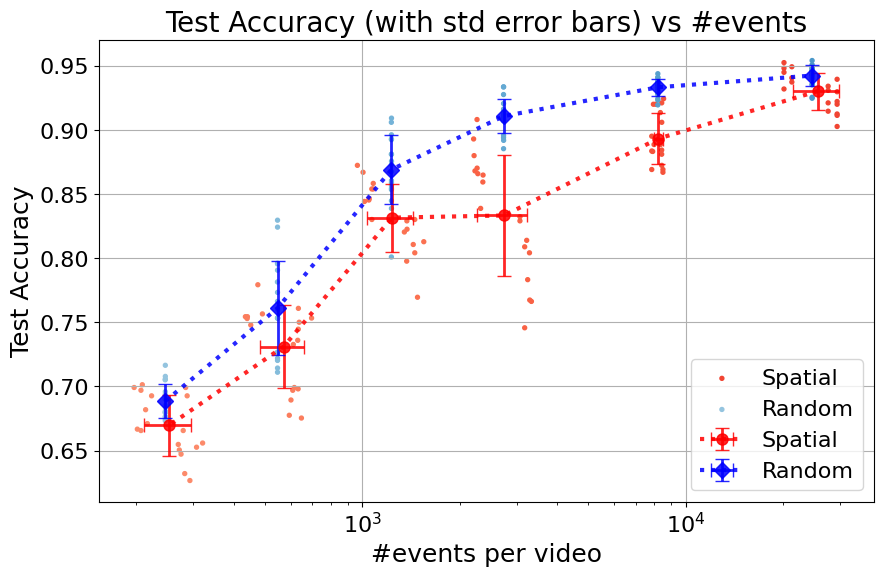

In [90]:
ds_name = "DVSGESTURE_TONIC" 
for ii,r in enumerate(result_dict[ds_name]):
    print(f"{ii}: {r.label}")
plot_all(
            [result_dict[ds_name][i] for i in [0,2]],
            save_to=None, 
            scatter_dots=True, 
            mean_line=True, 
            scatter_range=(0.4, 0.6)
         )

0: Spatial (dataset wide random offsets)
1: Temporal (dataset wide random offsets)
2: Random (fixed subsampling)
3: Spatiotemporal 30 7x7
4: Spatiotemporal (mean normalized)
5: Baseline (event count)
6: TOS 2D Harris


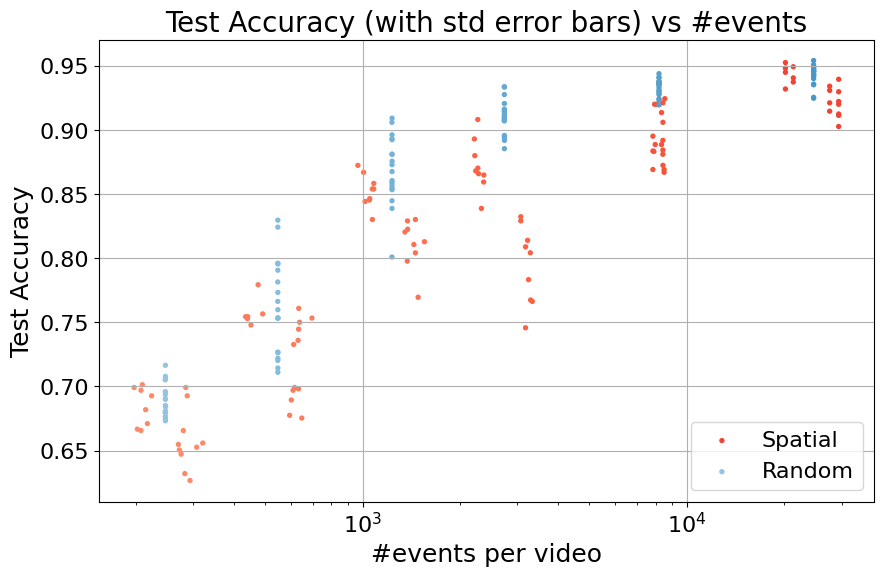

In [89]:
ds_name = "DVSGESTURE_TONIC" 

cm_dic = {
                'spatial_dataset_wide_random_offsets': 'Reds',
                'random_fixed': 'Blues',
}
c_dic = {
                'spatial_dataset_wide_random_offsets': 'red',
                'random_fixed': 'blue',
}

for ii,r in enumerate(result_dict[ds_name]):
    print(f"{ii}: {r.label}")

plot_all(
    [result_dict[ds_name][i] for i in [0,2]], 
        scatter_dots=True,
        mean_line=False, 
        scatter_range=(0.4, 0.6),
        colormap_dict_=cm_dic,
        color_dict_= c_dic,
        )

0: Spatial (dataset wide random offsets)
1: Temporal (dataset wide random offsets)
2: Random (fixed subsampling)
3: Spatiotemporal 30 7x7
4: Spatiotemporal (mean normalized)
5: Baseline (event count)
6: TOS 2D Harris


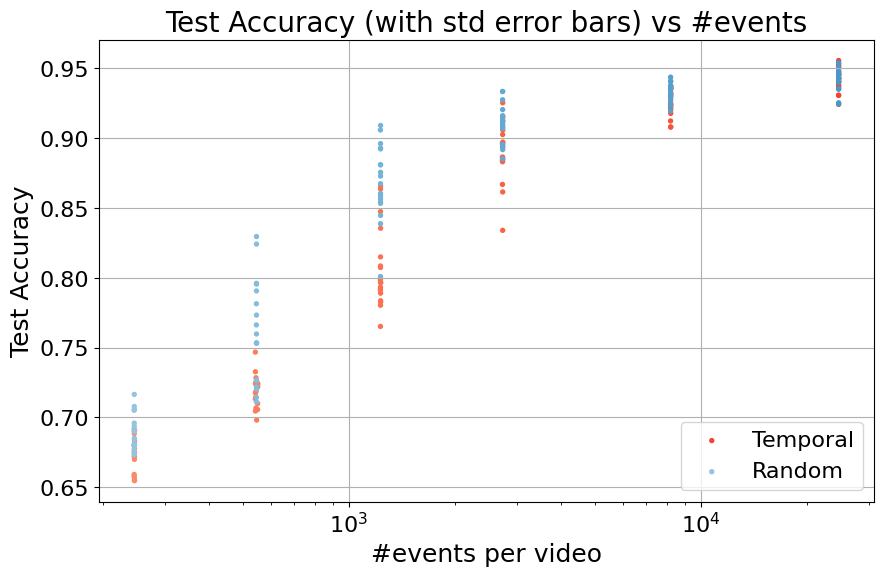

In [81]:
ds_name = "DVSGESTURE_TONIC" 

cm_dic = {
                'temporal_dataset_wide_random_offset': 'Reds',
                'random_fixed': 'Blues',
}
c_dic = {
                'temporal_dataset_wide_random_offset': 'red',
                'random_fixed': 'blue',
}

for ii,r in enumerate(result_dict[ds_name]):
    print(f"{ii}: {r.label}")

plot_all(
    [result_dict[ds_name][i] for i in [1,2]], 
        scatter_dots=True,
        mean_line=False, 
        scatter_range=(0.4, 0.6),
        colormap_dict_=cm_dic,
        color_dict_= c_dic,
        )

0: Spatial (dataset wide random offsets)
1: Temporal (dataset wide random offsets)
2: Random (fixed subsampling)
3: Spatiotemporal 30 7x7
4: Spatiotemporal (mean normalized)
5: Baseline (event count)
6: TOS 2D Harris


KeyError: 'spatiotemporal_fixed_30_7x7'

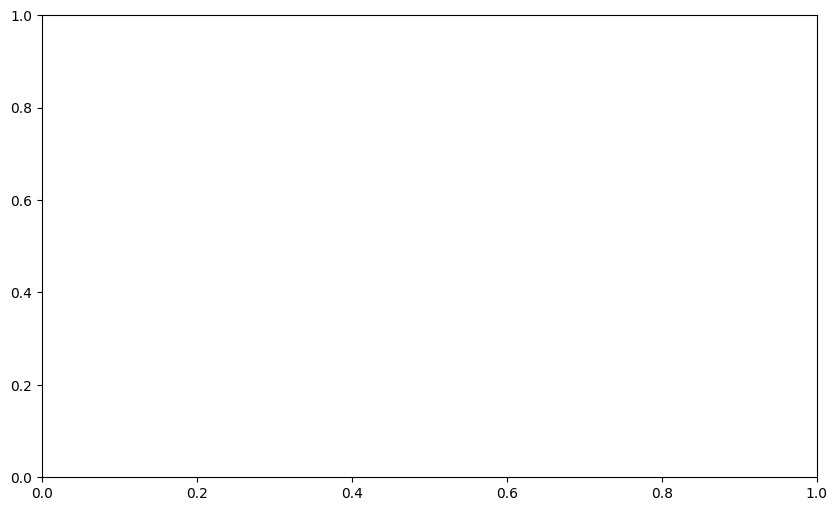

In [82]:
c_dic = {
        'spatiotemporal_fixed_30_7x7': 'green',
        'tos2dharris_fixed': 'purple',
}

for ii,r in enumerate(result_dict[ds_name]):
    print(f"{ii}: {r.label}")

plot_all(
    [result_dict[ds_name][i] for i in [3,6]], 
        scatter_dots=True,
        mean_line=True, 
        scatter_range=(0.4, 0.6),
        colormap_dict_=cm_dic,
        color_dict_= c_dic,
        )

0: Spatial (dataset wide random offsets)
1: Temporal (dataset wide random offsets)
2: Random (fixed subsampling)
3: Spatiotemporal 30 7x7
4: Spatiotemporal (mean normalized)
5: Baseline (event count)
6: TOS 2D Harris


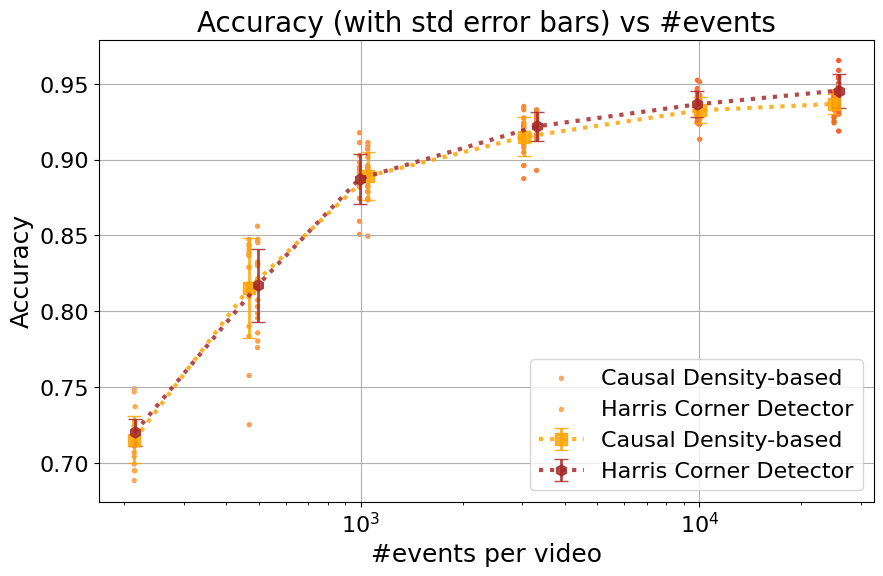

In [ ]:
ds_name = "DVSGESTURE_TONIC" 
for ii,r in enumerate(result_dict[ds_name]):
    print(f"{ii}: {r.label}")
if is_saving_allowed:
    save_to_path = os.path.join(subfolder_name,f'{ds_name}.eps')
else:
    save_to_path = None
plot_all([result_dict[ds_name][i] for i in [3,6]],save_to=save_to_path, scatter_dots=True, mean_line=True, scatter_range=(0.4, 0.6))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0: Spatial (dataset wide random offsets)
1: Temporal (dataset wide random offsets)
2: Random (fixed subsampling)
3: Spatiotemporal 30 7x7
4: Spatiotemporal (mean normalized)
5: Baseline (event count)
6: TOS 2D Harris


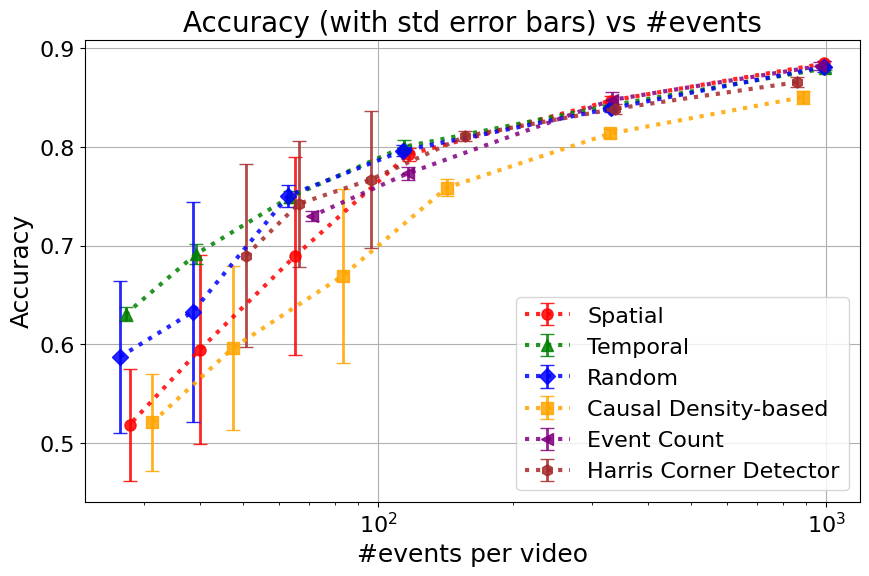

In [ ]:
ds_name = "NCARS" 
for ii,r in enumerate(result_dict[ds_name]):
    print(f"{ii}: {r.label}")
if is_saving_allowed:
    save_to_path = os.path.join(subfolder_name,f'{ds_name}.eps')
else:
    save_to_path = None
plot_all([result_dict[ds_name][i] for i in [0,1,2,3,5,6]],save_to=save_to_path)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0: Spatial (dataset wide random offsets)
1: Temporal (dataset wide random offsets)
2: Random (fixed subsampling)
3: Spatiotemporal 30 7x7
4: Spatiotemporal (mean normalized)
5: Baseline (event count)
6: TOS 2D Harris


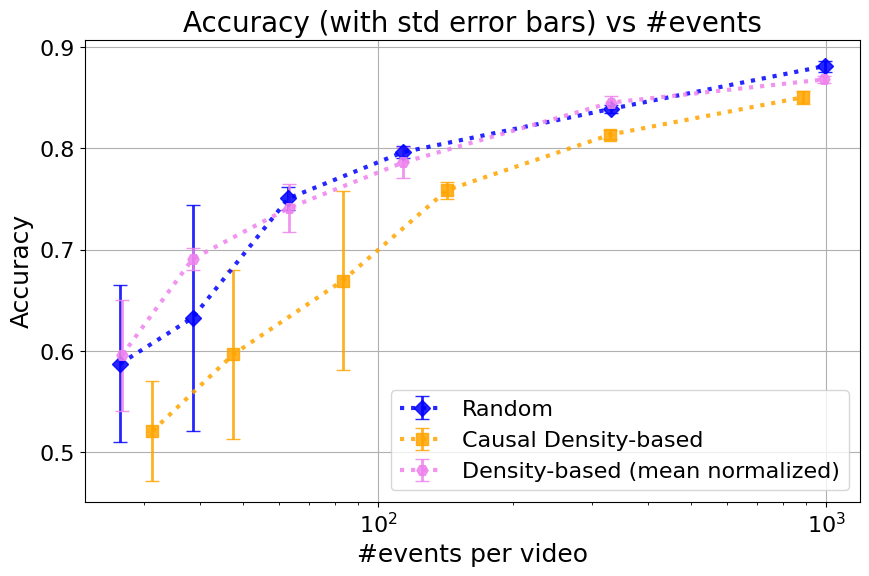

In [ ]:
ds_name = "NCARS" 
for ii,r in enumerate(result_dict[ds_name]):
    print(f"{ii}: {r.label}")
if is_saving_allowed:
    save_to_path = os.path.join(subfolder_name,f'{ds_name}_normalized_vs_unnormalized.eps')
else:
    save_to_path = None
plot_all([result_dict[ds_name][i] for i in [2,3,4]],save_to=save_to_path)